In [1]:
import LinAlg as LA
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import Debug
import random

In [2]:
# Function to generate random points within the box (1,1,1) to (2,2,2)
def generate_random_points(num_points: int):
    points = []
    for _ in range(num_points):
        x = random.uniform(1, 2)
        y = random.uniform(1, 2)
        z = random.uniform(1, 2)
        points.append(LA.Vector(x, y, z))
    return points

# Generate 10 random points
random_points = generate_random_points(10)

# Print the generated points
for point in random_points:
    print(point)


theta = np.pi / 4  # 45 degrees rotation around Z-axis
phi = np.pi / 6    # 30 degrees rotation around Y-axis
translation = LA.Vector(0.5, 0.5, 2000)  # Translation vector

transformation_matrix = Debug.create_transformation_matrix(theta, phi, translation)
print(transformation_matrix)


Vector(1.66, 1.99, 1.47)
Vector(1.40, 1.14, 1.08)
Vector(1.71, 1.35, 1.77)
Vector(1.79, 1.26, 1.82)
Vector(1.63, 1.82, 1.88)
Vector(1.54, 1.42, 1.50)
Vector(1.76, 1.74, 1.87)
Vector(1.71, 1.22, 1.40)
Vector(1.44, 1.58, 1.60)
Vector(1.05, 1.78, 1.22)
[[   0.6124   -0.6124    0.5       0.5   ]
 [   0.7071    0.7071    0.        0.5   ]
 [  -0.3536    0.3536    0.866  2000.    ]
 [   0.        0.        0.        1.    ]]


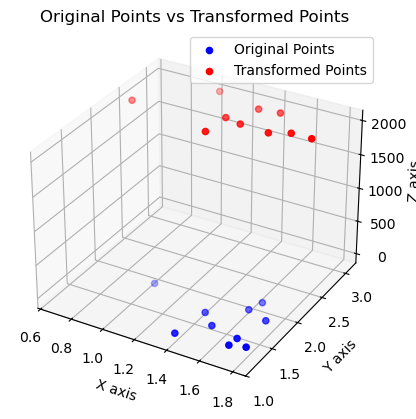

In [3]:
transformed_points = LA.transform_points(transformation_matrix, random_points)
Debug.plot_original_vs_transformed(random_points, transformed_points)

Find transformation from random_points to transformed_points

In [4]:
# Convert transformed_points and random_points to numpy arrays
transformed_points_np = Debug.vectors_to_numpy(transformed_points)
random_points_np = Debug.vectors_to_numpy(random_points)

# Call the function with correct inputs
R, t = LA.point_cloud_registration_least_squares(transformed_points_np, random_points_np)

print("Rotation matrix:", R)
print("Translation vector:", t, "\n")

print("Ground truth: \n", transformation_matrix)

Rotation matrix: [[ 6.12380052e-01 -6.12372966e-01  4.99990023e-01]
 [ 7.07094498e-01  7.07119064e-01  2.00657606e-05]
 [-3.53564765e-01  3.53527907e-01  8.66031164e-01]]
Translation vector: [5.00004431e-01 4.99969155e-01 2.00000004e+03] 

Ground truth: 
 [[   0.6124   -0.6124    0.5       0.5   ]
 [   0.7071    0.7071    0.        0.5   ]
 [  -0.3536    0.3536    0.866  2000.    ]
 [   0.        0.        0.        1.    ]]


Proposed point:  Vector(1.03, 3.08, 2001.39)
Proposed point:  Vector(1.20, 2.30, 2000.84)
Proposed point:  Vector(1.61, 2.66, 2001.41)
Proposed point:  Vector(1.73, 2.66, 2001.39)
Proposed point:  Vector(1.32, 2.94, 2001.69)
Proposed point:  Vector(1.32, 2.59, 2001.26)
Proposed point:  Vector(1.45, 2.97, 2001.61)
Proposed point:  Vector(1.50, 2.57, 2001.04)
Proposed point:  Vector(1.22, 2.64, 2001.44)
Proposed point:  Vector(0.66, 2.50, 2001.31)
Truth point:  Vector(1.03, 3.08, 2001.39)
Truth point:  Vector(1.20, 2.30, 2000.84)
Truth point:  Vector(1.61, 2.66, 2001.41)
Truth point:  Vector(1.73, 2.66, 2001.39)
Truth point:  Vector(1.32, 2.94, 2001.69)
Truth point:  Vector(1.32, 2.59, 2001.26)
Truth point:  Vector(1.45, 2.97, 2001.61)
Truth point:  Vector(1.50, 2.57, 2001.04)
Truth point:  Vector(1.22, 2.64, 2001.44)
Truth point:  Vector(0.66, 2.50, 2001.31)


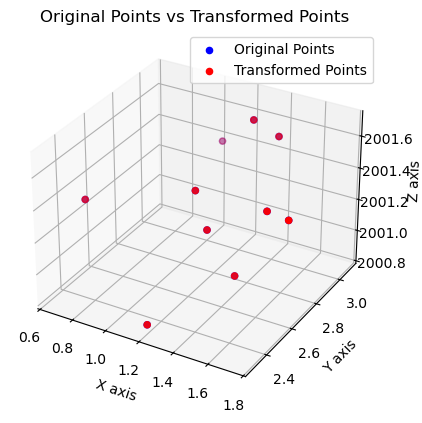

In [5]:
Proposed_transformation_matrix = LA.Frame(R, t)
Proposed_transformed_points = LA.transform_points(Proposed_transformation_matrix, random_points)

for point in Proposed_transformed_points:
    print("Proposed point: " ,point)

for point in transformed_points:
    print("Truth point: ", point)


Debug.plot_original_vs_transformed(transformed_points, Proposed_transformed_points)  